In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [219]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)


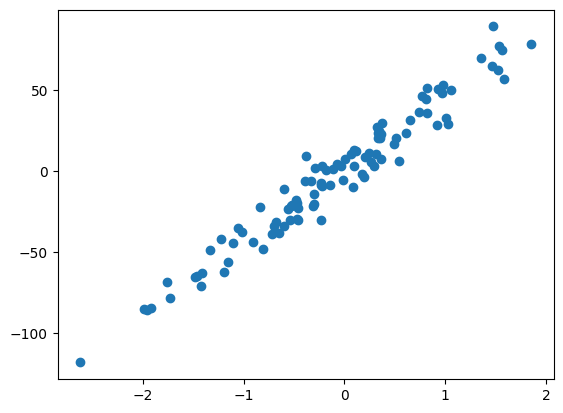

In [198]:
plt.scatter(X,y)

In [185]:
print(X.shape)
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [186]:
#matrice X
X=np.hstack((X,np.ones(X.shape)))
X.shape

(100, 2)

In [38]:
#deuxieme methode
X = np.concatenate((X, np.ones((m,1))), axis=1)
X.shape

(100, 2)

In [122]:
m=X.shape[0]
n=X.shape[1]
n

2

In [138]:
theta = np.random.randn(n,1)
theta.shape

(2, 1)

# Modele

In [140]:
def model(x,theta):
    return x.dot(theta)

In [141]:
f=model(X,theta)

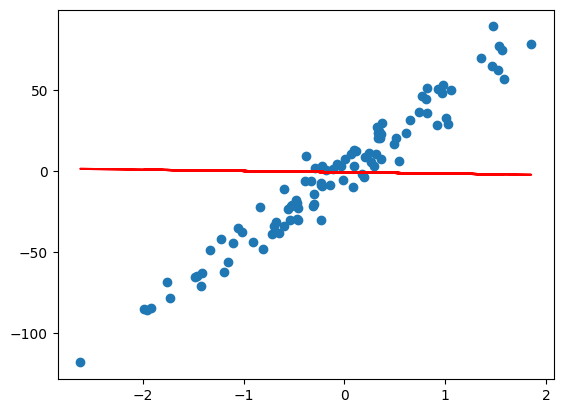

In [130]:
plt.plot(X,f,c ="r")
plt.scatter(X,y)

# Cost Function

In [133]:
def cost_function(X,y,theta):
    m=X.shape[0]

    return (1 /(2*m))*np.sum((model(X,theta)-y)**2)

In [142]:
loss =  costFunction(X,y,theta)
loss

np.float64(8359897.130555124)

# Gradients et Descente de Gradients

In [170]:
def grad(X,y,theta):
     m=X.shape[0]
     d_theta = (1 /m) * (np.dot(X.T,model(X,theta)-y))
     return d_theta


In [171]:
d_theta=grad(X,y,theta)
d_theta

array([[-36.31331866],
       [  4.65097302]])

In [169]:
def gradient_descente(theta,d_theta,learning_rate):
    return theta - learning_rate * d_theta

In [152]:
 gradient_descente(theta,d_theta,0.2)

array([[7.81819579],
       [0.32893846]])

# Machine Learning

In [183]:
def linear_regression(X,y,learning_rate=0.1,nb_iter=200):

    theta = np.random.randn(n,1)
    cost_history=[]
    for i in range(nb_iter):
        
        d_theta=grad(X,y,theta)
        theta = gradient_descente(theta,d_theta,learning_rate)
        cost_history.append(cost_function(X,y,theta))
        
    return  theta ,cost_history
        
        
        
        

In [187]:
theta,cost_history=linear_regression(X,y,learning_rate=0.2,nb_iter=200)

# Courbe D'apprentissage

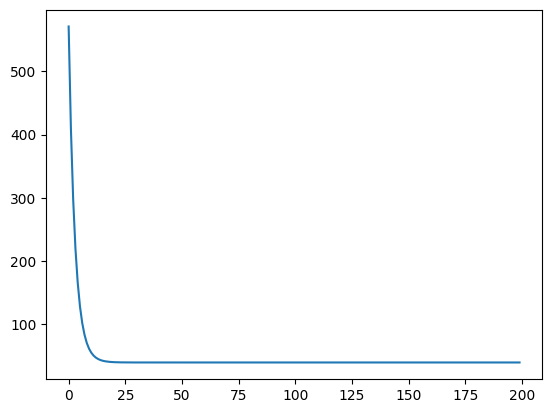

In [188]:
plt.plot(cost_history)
plt.show()

# Evaluation

In [189]:
predictions = model(X,theta)

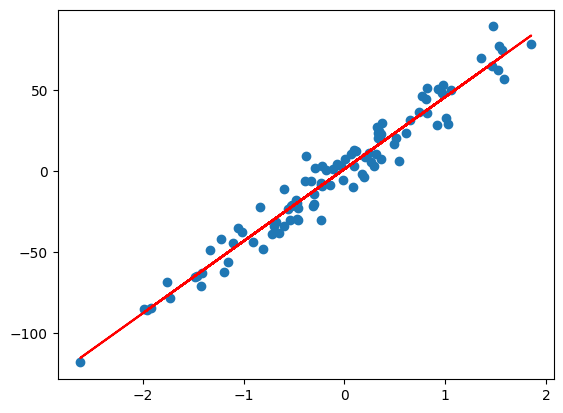

In [191]:
plt.scatter(X,y)
plt.plot(X,predictions ,c="r")

# Coefficient de determination

In [287]:
def coef_determination(y,pred):
    u=(y-pred).sum()
    v= ((y-y.mean())**2).sum()
    return 1- (u/v)

In [285]:
r2=coef_determination(y,predictions)
r2

np.float64(0.9997702233861563)

## This LinearRegression class implements a simple linear regression model in Python using gradient descent. It adds a bias term to the input data, initializes the weights randomly, and updates them iteratively to minimize the Mean Squared Error (MSE). The fit() method trains the model, while the predict() method makes predictions on new data. 

In [299]:
class LinearRegression:
    def __init__(self,learning_rate,nb_iter):
        
        #self.X = np.hstack((X,np.ones(X.shape)))
        #self.y = y=y.reshape(y.shape[0],1)
        self.learning_rate = learning_rate
        self.nb_iter = nb_iter
        self.theta = None
        self.cost_history = []
        


    def model(self,X,theta):
        return np.dot(X,theta)

    def cost_function(X,y,theta):
        m=X.shape[0]
        return (1 /(2*m))*np.sum((model(X,theta)-y)**2)    

    def grad(self,X,y,theta):
        m=X.shape[0]
        d_theta = (1 /m) * (np.dot(X.T,model(X,theta)-y))
        return d_theta

    #def gradient_descente(theta,d_theta,learning_rate):
        #return theta - learning_rate * d_theta  

    def fit(self,X,y):
        # Ajouter une colonne de 1 pour le biais
        self.X = np.hstack((X,np.ones(X.shape)))
        self.y = y=y.reshape(y.shape[0],1)
        
        self.theta=np.random.randn(self.X.shape[1],1)

        #cost_history=[]
        for i in range(self.nb_iter):
        
            d_theta=grad(self.X,self.y,self.theta)
            self.theta = self.theta  - self.learning_rate * d_theta 
            self.cost_history.append(cost_function(self.X,self.y,self.theta))
        
        return  theta , self.cost_history


    def predict(self,x_test):
            x_test = np.hstack((x_test,np.ones(x_test.shape)))
            return model(x_test,self.theta)


In [296]:
mode =  LinearRagression(0.1,100)

In [297]:
theta,cost_history=mode.fit(X,y)

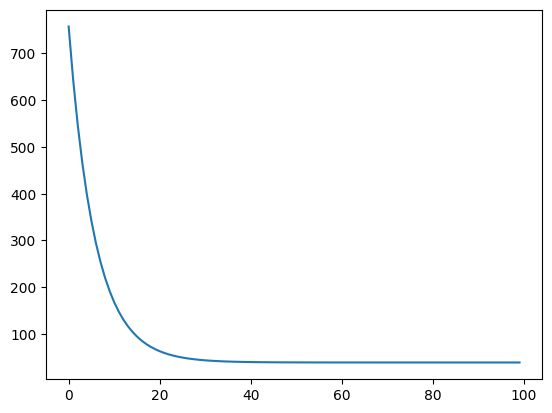

In [298]:
plt.plot(cost_history)
plt.show()

In [293]:
predictions=mode.predict(X)

In [294]:
coef_determination(y,predictions)

np.float64(0.9997745779366438)